## <center>Imports</center>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## <center>Dataset (CIFAR-10) </center>

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [7]:
classes=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [8]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

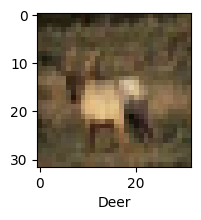

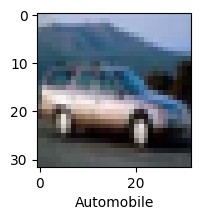

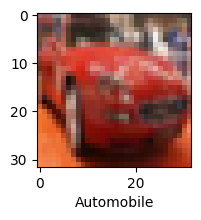

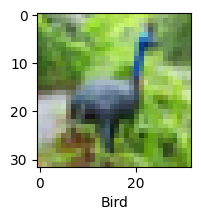

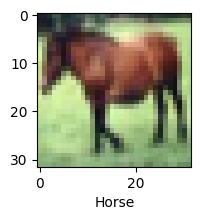

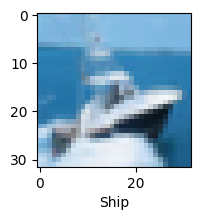

In [9]:
for i in range(10):
    plot_sample(X_train,y_train,i)

## <center>Normalization</center>

In [10]:
X_train=X_train/255
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [12]:
X_test=X_test/255
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

## <center>Using Artifical Neural Network (ANN)</center>

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3016 - loss: 1.9300
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4275 - loss: 1.6341
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4543 - loss: 1.5451
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4763 - loss: 1.4838
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4949 - loss: 1.4393
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5101 - loss: 1.3922
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5247 - loss: 1.3478
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5401 - loss: 1.3113
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5576 - loss: 1.2702
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5660 - loss: 1.2412


## <center>Classification Report for ANN</center>

In [14]:
y_pred=ann.predict(X_test)
y_pred_class=[np.argmax(el) for el in y_pred]
print("Classification Report:\n",classification_report(y_test,y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60      1000
           1       0.61      0.65      0.63      1000
           2       0.50      0.30      0.37      1000
           3       0.32      0.45      0.38      1000
           4       0.55      0.36      0.44      1000
           5       0.41      0.30      0.35      1000
           6       0.56      0.60      0.58      1000
           7       0.66      0.48      0.56      1000
           8       0.71      0.58      0.64      1000
           9       0.41      0.73      0.53      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.51     10000
weighted avg       0.53      0.51      0.51     10000



## <center>Using Convolutional Neural Network (CNN)</center>

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3, 3), activation='relu',input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=25)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3445 - loss: 1.7663
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5643 - loss: 1.2276
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6323 - loss: 1.0479
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6713 - loss: 0.9410
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6970 - loss: 0.8650
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7208 - loss: 0.8028
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7372 - loss: 0.7536
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7549 - loss: 0.6989
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7653 - loss: 0.6616
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7798 - loss: 0.6261
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7951 - loss: 0.5868
Epoch 12/25
1563/1563 ━━━━━━━━

In [23]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7111 - loss: 1.1438


[1.1982100009918213, 0.7067999839782715]

In [24]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.41052634e-03, 1.59004591e-02, 5.37491578e-05, 5.56451082e-01,
        2.29880330e-04, 1.48519814e-01, 6.86761399e-04, 1.81964369e-05,
        2.73481458e-01, 3.24810972e-03],
       [8.76282400e-04, 7.72963688e-02, 5.08788900e-10, 1.77403911e-10,
        5.03667952e-09, 3.00749849e-13, 2.28649544e-10, 1.70263397e-14,
        9.21730816e-01, 9.64422798e-05],
       [1.78128597e-03, 3.46518576e-01, 4.85689441e-07, 1.20368341e-05,
        1.60914424e-04, 1.39376007e-05, 1.61434400e-06, 1.03754644e-06,
        5.73475838e-01, 7.80343264e-02],
       [8.79989684e-01, 9.45920008e-04, 1.29875611e-03, 7.15930491e-06,
        1.16073022e-06, 6.37370476e-08, 2.08194706e-06, 6.15626328e-10,
        1.17753886e-01, 1.30466208e-06],
       [2.59926969e-10, 2.38448621e-07, 2.75355615e-05, 4.34221380e-04,
        7.51381461e-03, 1.92588936e-06, 9.92022276e-01, 5.60532232e-10,
        1.86040836e-10, 6.71785161e-09]], dtype=float32)

## <center>Results</center>

In [25]:
y_class=[np.argmax(el) for el in y_pred]
y_class[:5]

[3, 8, 8, 0, 6]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

## <center>Classification Report for CNN</center>

In [27]:
print("Classification Report:\n",classification_report(y_test,y_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.81      0.82      0.81      1000
           2       0.58      0.64      0.61      1000
           3       0.58      0.45      0.51      1000
           4       0.69      0.64      0.66      1000
           5       0.60      0.66      0.63      1000
           6       0.71      0.82      0.76      1000
           7       0.73      0.76      0.74      1000
           8       0.86      0.75      0.80      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

